In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

df_train_test = pd.read_csv(r'D:\ad\tutorials\Data-analys\works\analytics_vidya_loanprediction\test_lAUu6dG.csv')
df_train = pd.read_csv(r'D:\ad\tutorials\Data-analys\works\analytics_vidya_loanprediction\train_ctrUa4K.csv')
df_train.Loan_Status=df_train.Loan_Status.map({'Y':1,'N':0})
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [175]:
print(df_train.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area  Loan_Status  
0             1.0         Urban            1  
1             1.0         Rural            0  
2             1.0

In [176]:
#will check for missing values in the dataset using ISNULL 
Loan_Status=df_train.Loan_Status
df_train.drop('Loan_Status',axis=1,inplace=True)

df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

C:\Users\ad-jma\AppData\Local\Temp\ipykernel_19512\2077594927.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=df_train_test.corr()


<Axes: >

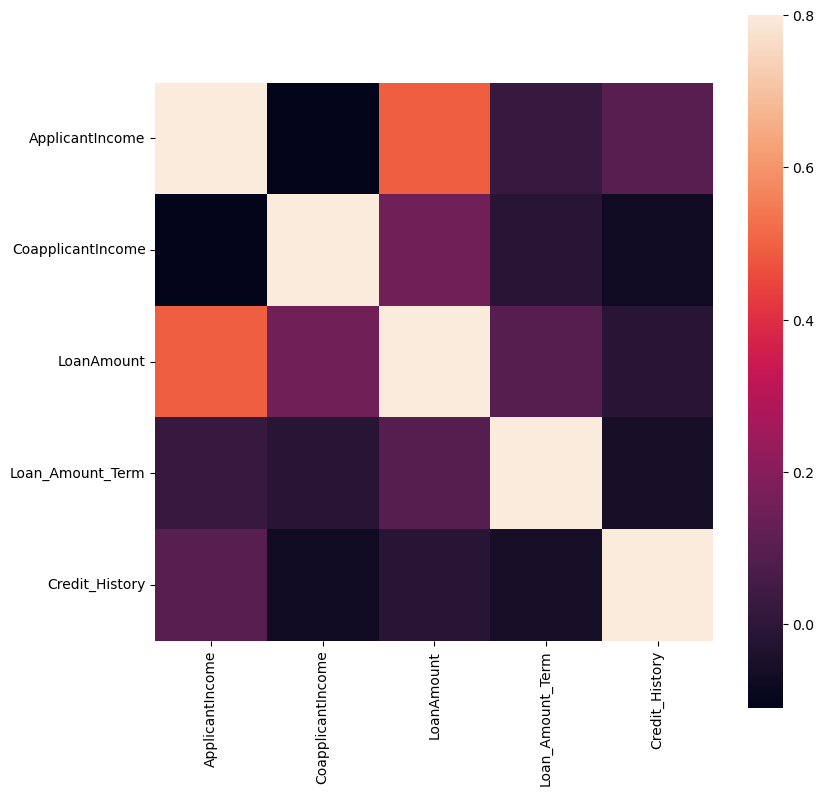

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
corrmat=df_train_test.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)



In [7]:
print(df_train.isnull().sum().sort_values(ascending=False))

Self_Employed        32
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


In [171]:
df_train_test.isnull().sum()

Gender                 0
Married                0
Dependents           367
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
dtype: int64

In [226]:
df_train_test.LoanAmount.fillna(df_train_test.LoanAmount.median(),inplace=True)
df_train_test.Loan_Amount_Term.fillna(df_train_test.Loan_Amount_Term.mean(),inplace=True)

df_train_test.Gender=df_train_test.Gender.map({'Male':1,'Female':0})
df_train_test.Gender.value_counts()



df_train_test.Married=df_train_test.Married.map({'Yes':1,'No':0})

df_train_test.Dependents=df_train_test.Dependents.map({'0':0,'1':1,'2':2,'3+':3})



df_train_test.Education=df_train_test.Education.map({'Graduate':1,'Not Graduate':0})




df_train_test['Education'].value_counts()

df_train_test.Self_Employed=df_train_test.Self_Employed.map({'Yes':1,'No':0})
df_train_test['Self_Employed'].value_counts()

df_train_test.Property_Area=df_train_test.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df_train_test['Property_Area'].value_counts()

df_train_test['LoanAmount'].value_counts()



125.0    16
150.0    12
110.0    10
100.0     9
90.0      9
         ..
71.0      1
157.0     1
93.0      1
61.0      1
98.0      1
Name: LoanAmount, Length: 144, dtype: int64

In [227]:
df_train_test.Credit_History.size

367

In [228]:
df_train_test.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [229]:
df_train_test.isnull().sum()

Loan_ID                0
Gender               367
Married              367
Dependents           367
Education            367
Self_Employed        367
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area        367
dtype: int64

In [230]:
df_train_test.Married.fillna(np.random.randint(0,2),inplace=True)

In [231]:


df_train_test.LoanAmount.fillna(df_train_test.LoanAmount.median(),inplace=True)



In [232]:
df_train_test.Loan_Amount_Term.fillna(df_train_test.Loan_Amount_Term.mean(),inplace=True)

In [233]:
df_train_test.isnull().sum()

Loan_ID                0
Gender               367
Married                0
Dependents           367
Education            367
Self_Employed        367
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area        367
dtype: int64

In [234]:


df_train_test.Gender.value_counts()



Series([], Name: Gender, dtype: int64)

In [235]:
from random import randint 
df_train_test.Gender.fillna(np.random.randint(0,2),inplace=True)

In [117]:
df_train_test.Gender.value_counts()

Male      286
Female     70
0          11
Name: Gender, dtype: int64

In [250]:

df_train_test.Dependents=df_train_test.Dependents.map({'0':0,'1':1,'2':2,'3+':3})


df_train_test.Property_Area=df_train_test.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})



df_train_test.Education=df_train_test.Education.map({'Graduate':1,'Not Graduate':0})


df_train_test.Property_Area.value_counts()



df_train_test.Dependents.value_counts()
df_train_test.Dependents.fillna(df_train_test.Dependents.median(),inplace=True)


df_train_test.Self_Employed.fillna(np.random.randint(0,2),inplace=True)


df_train_test.isnull().sum()


Loan_ID                0
Gender                 0
Married                0
Dependents           367
Education            367
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area        367
dtype: int64

In [251]:
df_train_test.Self_Employed.fillna(np.random.randint(0,2),inplace=True)
df_train_test.Dependents.fillna(df_train_test.Dependents.median(),inplace=True)


df_train_test.Credit_History.fillna(np.random.randint(0,2),inplace=True)



In [238]:


df_train_test.isnull().sum()



Loan_ID                0
Gender                 0
Married                0
Dependents           367
Education            367
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area        367
dtype: int64

In [252]:
df_train_test.LoanAmount.fillna(df_train_test.LoanAmount.median(),inplace=True)


df_train_test.Loan_Amount_Term.fillna(df_train_test.Loan_Amount_Term.mean(),inplace=True)

df_train_test.Dependents.fillna(df_train_test.Dependents.median(),inplace=True)
df_train_test.Married.fillna(np.random.randint(0,2),inplace=True)



In [253]:


#df_train_test.drop('Loan_ID',inplace=True,axis=1)

df_train_test.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents           367
Education            367
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area        367
dtype: int64

In [254]:


train_X=df_train_test.iloc[:614,]
train_y=Loan_Status
X_test=df_train_test.iloc[614:,]
seed=7



In [255]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=seed)

ValueError: Found input variables with inconsistent numbers of samples: [367, 614]

In [152]:


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



In [256]:
models=[]
models.append(("logreg",LogisticRegression()))
models.append(("tree",DecisionTreeClassifier()))
models.append(("lda",LinearDiscriminantAnalysis()))
models.append(("svc",SVC()))
models.append(("knn",KNeighborsClassifier()))
models.append(("nb",GaussianNB()))

In [258]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [259]:
for name,model in models:
    #print(model)
    kfold=KFold(n_splits=10,random_state=seed)
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,fold_shuffle=True,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))



ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [260]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
svc=LogisticRegression()
svc.fit(train_X,train_y)
pred=svc.predict(test_X)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

ValueError: could not convert string to float: 'LP001015'

In [261]:
df_output=pd.DataFrame()

In [262]:


outp=svc.predict(X_test).astype(int)
outp



ValueError: Found array with 0 sample(s) (shape=(0, 12)) while a minimum of 1 is required by LogisticRegression.

In [263]:


df_output['Loan_ID']=Loan_ID
df_output['Loan_Status']=outp



NameError: name 'Loan_ID' is not defined

In [264]:


df_output.head()



""


In [265]:
df_output[['Loan_ID','Loan_Status']].to_csv(r'D:\ad\tutorials\Data-analys\works\analytics_vidya_loanprediction\output.csv',index=False)

KeyError: "None of [Index(['Loan_ID', 'Loan_Status'], dtype='object')] are in the [columns]"